# Home credit default risk

El objetivo de home credit es expandir la inclusión financiera. Se especializa en proveer prestamos a personas con ninguna o poca historia crediticia, ya que desafortunadamente este es un factor que muchas veces impide a las personas acceder a los recursos financieros. 

Para lograr esto, Home Credit hace uso de un análisis de big data, así como métdodos tradicionales de verificación de clientes, para evaluar su capacidad de solvencia y así generar prácticas de préstamo responsables.  

De esta premisa sale el problema que se quiere resolver. Mediante metodos de machine learning, se quiere llegar a hacer predicciones para asegurarse que aquellos clientes que tengan la posibilidad de pagar un crédito no sean rechazados. Por esto, tenemos una serie de datasets, cada uno con información diferente referente a los clientes, como términos del crédito que solicitan, términos de créditos anteriores, información personal, entre otros. Dichos datasets, sin embargo, tienen que análisarse y limpiarse primero, para así asegurar que la información que presentan sea realmente significativa a la hora de crear el modelo.

Primero, se descargan los datasets a utilizar:

In [164]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

#Datos de drive

from google.colab import drive
drive.mount('/content/drive')

test_values = pd.read_csv('drive/MyDrive/Ciencia de datos/application_test.csv')
train_values = pd.read_csv('drive/MyDrive/Ciencia de datos/application_train.csv')
installment = pd.read_csv('drive/MyDrive/Ciencia de datos/installments_payments.csv')
bureau = pd.read_csv('drive/MyDrive/Ciencia de datos/bureau.csv')
previous_app = bureau = pd.read_csv('drive/MyDrive/Ciencia de datos/previous_application.csv')

train_values.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 1. Selección de variables

#### 1.1 Preselección de variables en train

debido a que hay una inmensa cantidad de variables en los datasets de Home credit, se hizo una preselección basada en mi estimación personal de variables que pueden llegar a ser importantes. Dichas variables en el dataset de train son las siguientes:

In [165]:
#Preselección de variables solo en train
col_train = ['SK_ID_CURR', 'TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
             'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
             'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
             'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT',
             'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

#### 1.2 Creación de variables

Se usan los otros datasets, así como el mismo train, para crear variables que puedan ser significativos. Entre los creados están el porcentaje promedio del pago hecho por cada cliente con respecto al total que tenían que pagar, los días máximos de mora que han tenido, la cantidad de creditos pasados que han sido aprobados o negados por cliente, ratios del crédito solicitado con el precio del bien para el que se solicitó, crédito solicitado con los ingresos totales del solicitante, anualidad con ingresos totales del solicitante y agrupaciones en grupos por edades de los clientes.

In [166]:
# porcentaje promedio de pagos hechos por los clientes, y días de mora máximo por clientes
installment['porcentaje_pago'] = installment.AMT_PAYMENT / installment.AMT_INSTALMENT
installment['dias_mora'] = installment.DAYS_INSTALMENT - installment.DAYS_ENTRY_PAYMENT

install_dummy = installment.groupby('SK_ID_CURR').agg(porcentaje_promedio_pago=('porcentaje_pago','mean'), dias_mora_max = ('dias_mora','max')).reset_index()
install_dummy.head()

,SK_ID_CURR,porcentaje_promedio_pago,dias_mora_max
0,100001,1.0,36.0
1,100002,1.0,31.0
2,100003,1.0,14.0
3,100004,1.0,11.0
4,100005,1.0,37.0


In [167]:
data = pd.merge(train_values.loc[:,col_train], install_dummy, on='SK_ID_CURR', how='left')
data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,porcentaje_promedio_pago,dias_mora_max
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-9461,-637,2,0.083037,0.262949,0.139376,1.0,31.0


In [168]:
#Creación de variables previous applicarion
#Aquí se observa los contratos anteriores que le han aceptado o denegado a los clientes, así como los que han cancelado. Estas variables las voy a incluir en train
previous_app.groupby('NAME_CONTRACT_STATUS').agg(estado_contrato=('NAME_CONTRACT_STATUS','count')).sort_values('estado_contrato',ascending=False)

,estado_contrato
NAME_CONTRACT_STATUS,
Approved,1036781
Canceled,316319
Refused,290678
Unused offer,26436


In [169]:
previous_dummy1 = previous_app.loc[previous_app.NAME_CONTRACT_STATUS == 'Approved'].groupby('SK_ID_CURR').agg(creditos_aprobados = ('NAME_CONTRACT_STATUS','count')).reset_index()
previous_dummy1.head(1)

,SK_ID_CURR,creditos_aprobados
0,100001,1


In [170]:
previous_dummy2 = previous_app.loc[previous_app.NAME_CONTRACT_STATUS == 'Refused'].groupby('SK_ID_CURR').agg(creditos_negados = ('NAME_CONTRACT_STATUS','count')).reset_index()
previous_dummy2.head(1)

,SK_ID_CURR,creditos_negados
0,100006,1


In [171]:
#Para confirmar que se seleccionaron bien los datos
print(previous_dummy1['creditos_aprobados'].sum())
print(previous_dummy2['creditos_negados'].sum())

1036781
290678


In [172]:
prev = pd.merge(previous_dummy1, previous_dummy2, on='SK_ID_CURR',how='left')
prev.fillna(0, inplace=True)
prev.head(10)

,SK_ID_CURR,creditos_aprobados,creditos_negados
0,100001,1,0.0
1,100002,1,0.0
2,100003,3,0.0
3,100004,1,0.0
4,100005,1,0.0
5,100006,5,1.0
6,100007,6,0.0
7,100008,4,0.0
8,100009,7,0.0
9,100010,1,0.0


In [173]:
data = pd.merge(data, prev, on='SK_ID_CURR',how='left')
data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-9461,-637,2,0.083037,0.262949,0.139376,1.0,31.0,1.0,0.0


In [174]:
#creación de variables en data
# Se clasifican las edades de los clientes por grupos
def age_group(days_birth):
  edad = -days_birth / 365
  if edad < 25: return 1
  elif edad < 35: return 2
  elif edad < 50: return 3
  elif edad < 65: return 4
  elif edad < 99: return 5
  else: return 0

data['grupo_edad'] = data.DAYS_BIRTH.apply(lambda x: age_group(x))
data['credito_bien_ratio'] = data.AMT_CREDIT / data.AMT_GOODS_PRICE
data['credito_ingreso_ratio'] = data.AMT_CREDIT / data.AMT_INCOME_TOTAL
data['anualidad_ingreso_ratio'] = data.AMT_ANNUITY / data.AMT_INCOME_TOTAL

data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,REGION_RATING_CLIENT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-9461,-637,2,0.083037,0.262949,0.139376,1.0,31.0,1.0,0.0,2,1.158397,2.007889,0.121978


#### 1.3 Nuevos nombres de columnas

Para facilitar el entendimiento de las variables, se cambian los nombres de las columnas en el dataset

In [175]:
nuevas_col = ['id', 'target', 'tipo_contrato', 'sexo', 'tiene_carro', 'tiene_vivienda', 'numero_hijos', 'ingreso_total', 'credito_total', 'anualidad',
              'precio_bien', 'tipo_ingreso', 'nivel_educacion', 'tipo_vivienda', 'dias_nacimiento', 'dias_empleado', 'rating_region', 'fuente_externa_1',
              'fuente_externa_2', 'fuente_externa_3', 'porcentaje_promedio_pago', 'dias_mora_max','creditos_aprobados', 'creditos_negados', 'grupo_edad',
              'credito_bien_ratio', 'credito_ingreso_ratio', 'anualidad_ingreso_ratio']

data.columns = nuevas_col
data.head(1)

,id,target,tipo_contrato,sexo,tiene_carro,tiene_vivienda,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,tipo_ingreso,nivel_educacion,tipo_vivienda,dias_nacimiento,dias_empleado,rating_region,fuente_externa_1,fuente_externa_2,fuente_externa_3,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-9461,-637,2,0.083037,0.262949,0.139376,1.0,31.0,1.0,0.0,2,1.158397,2.007889,0.121978


In [176]:
data.groupby('tipo_ingreso').agg(tipos_ingreso=('tipo_ingreso','count')).sort_values('tipos_ingreso',ascending=False)

,tipos_ingreso
tipo_ingreso,
Working,158774
Commercial associate,71617
Pensioner,55362
State servant,21703
Unemployed,22
Student,18
Businessman,10
Maternity leave,5


# 2. visualización de datos

In [177]:
# Para empezar, se observa la forma del dataset que se está utilizando
data.shape

(307511, 28)

#### 2.1 tipos de datos

Se observa de qué tipo es cada dato seleccionado. Esto servirá para, después, cambiar el tipo de dato según lo que se necesite

In [178]:
#Tipos de variables
data.dtypes

id                            int64
target                        int64
tipo_contrato                object
sexo                         object
tiene_carro                  object
tiene_vivienda               object
numero_hijos                  int64
ingreso_total               float64
credito_total               float64
anualidad                   float64
precio_bien                 float64
tipo_ingreso                 object
nivel_educacion              object
tipo_vivienda                object
dias_nacimiento               int64
dias_empleado                 int64
rating_region                 int64
fuente_externa_1            float64
fuente_externa_2            float64
fuente_externa_3            float64
porcentaje_promedio_pago    float64
dias_mora_max               float64
creditos_aprobados          float64
creditos_negados            float64
grupo_edad                    int64
credito_bien_ratio          float64
credito_ingreso_ratio       float64
anualidad_ingreso_ratio     

#### 2.2 Ver valores nulos

Ver los valores nulos permitirá identificar qué variables tienen muchos valores faltantes, para así determinar si deberían llenarse dichos datos, o si la variable se elimina.

In [179]:
data.isna().sum()

id                               0
target                           0
tipo_contrato                    0
sexo                             0
tiene_carro                      0
tiene_vivienda                   0
numero_hijos                     0
ingreso_total                    0
credito_total                    0
anualidad                       12
precio_bien                    278
tipo_ingreso                     0
nivel_educacion                  0
tipo_vivienda                    0
dias_nacimiento                  0
dias_empleado                    0
rating_region                    0
fuente_externa_1            173378
fuente_externa_2               660
fuente_externa_3             60965
porcentaje_promedio_pago     15894
dias_mora_max                15876
creditos_aprobados           17446
creditos_negados             17446
grupo_edad                       0
credito_bien_ratio             278
credito_ingreso_ratio            0
anualidad_ingreso_ratio         12
dtype: int64

En este caso, se observa que la variable con más valores nulos es la de fuente_externa_1, con 173.378 NAN. Esto, en el total de datos, representa el 56,38%, por lo que es una variable que se puede eliminar más adelante. Además, también se eliminará la fuente externa 3 porque, aunque en menor medida que la 1, también tiene muchos datos nulos

Por otro lado, se observa como no existen valores nulos para las variables categóricas seleccionadas, por lo que no se tendrán que rellenar datos en estas.

#### 2.3 Ver valores duplicados

In [180]:
# No hay valores duplicados
print(data.shape)
len(data.id.unique())

(307511, 28)


307511

#### 2.4 boxplots

Se puede usar este gráfico para identificar aquellas variables que tienen outliers, para así saber cuales hay que transformar en el proceso de limpieza y transformación de datos.

<AxesSubplot:ylabel='anualidad_ingreso_ratio'>

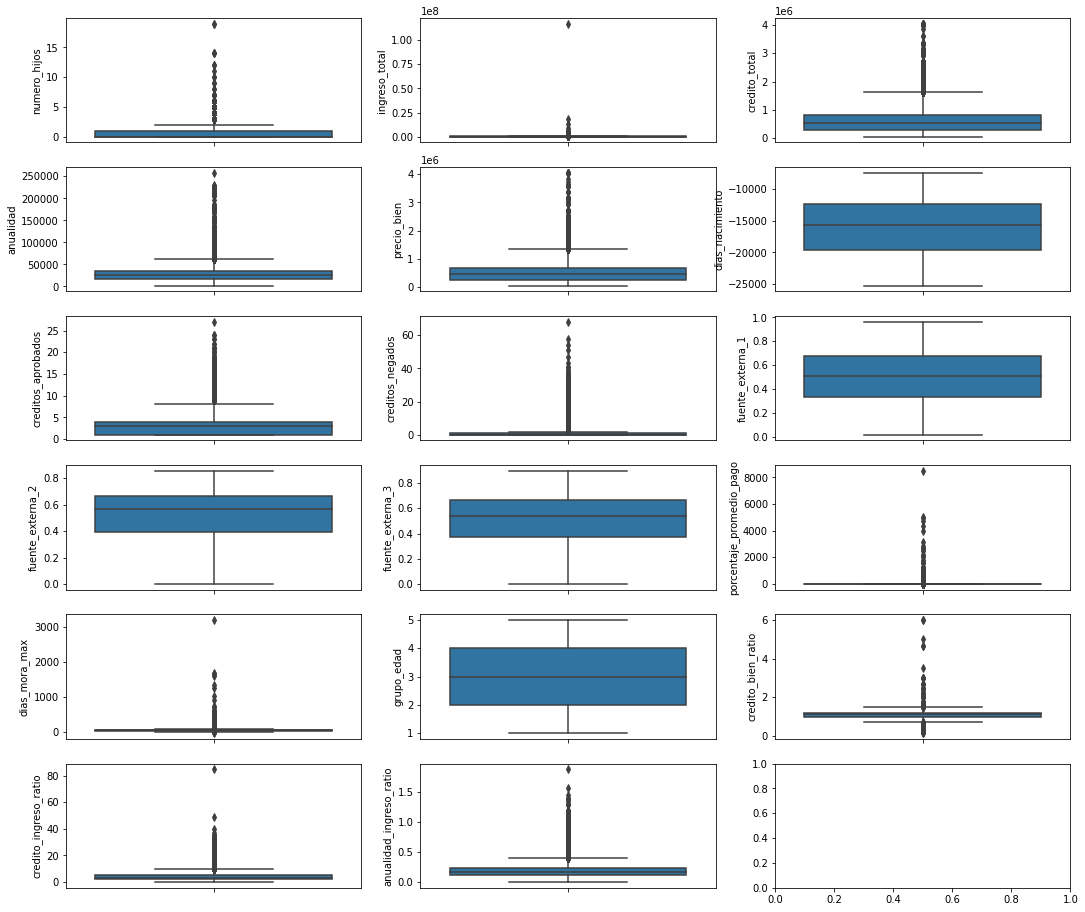

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(6,3,figsize=(18,16))
sns.boxplot(data=data,y='numero_hijos',ax=ax[0,0])
sns.boxplot(data=data,y='ingreso_total',ax=ax[0,1])
sns.boxplot(data=data,y='credito_total',ax=ax[0,2])
sns.boxplot(data=data,y='anualidad',ax=ax[1,0])
sns.boxplot(data=data,y='precio_bien',ax=ax[1,1])
sns.boxplot(data=data,y='dias_nacimiento',ax=ax[1,2])
sns.boxplot(data=data,y='creditos_aprobados',ax=ax[2,0])
sns.boxplot(data=data,y='creditos_negados',ax=ax[2,1])
sns.boxplot(data=data,y='fuente_externa_1',ax=ax[2,2])
sns.boxplot(data=data,y='fuente_externa_2',ax=ax[3,0])
sns.boxplot(data=data,y='fuente_externa_3',ax=ax[3,1])
sns.boxplot(data=data,y='porcentaje_promedio_pago',ax=ax[3,2])
sns.boxplot(data=data,y='dias_mora_max',ax=ax[4,0])
sns.boxplot(data=data,y='grupo_edad',ax=ax[4,1])
sns.boxplot(data=data,y='credito_bien_ratio',ax=ax[4,2])
sns.boxplot(data=data,y='credito_ingreso_ratio',ax=ax[5,0])
sns.boxplot(data=data,y='anualidad_ingreso_ratio',ax=ax[5,1])

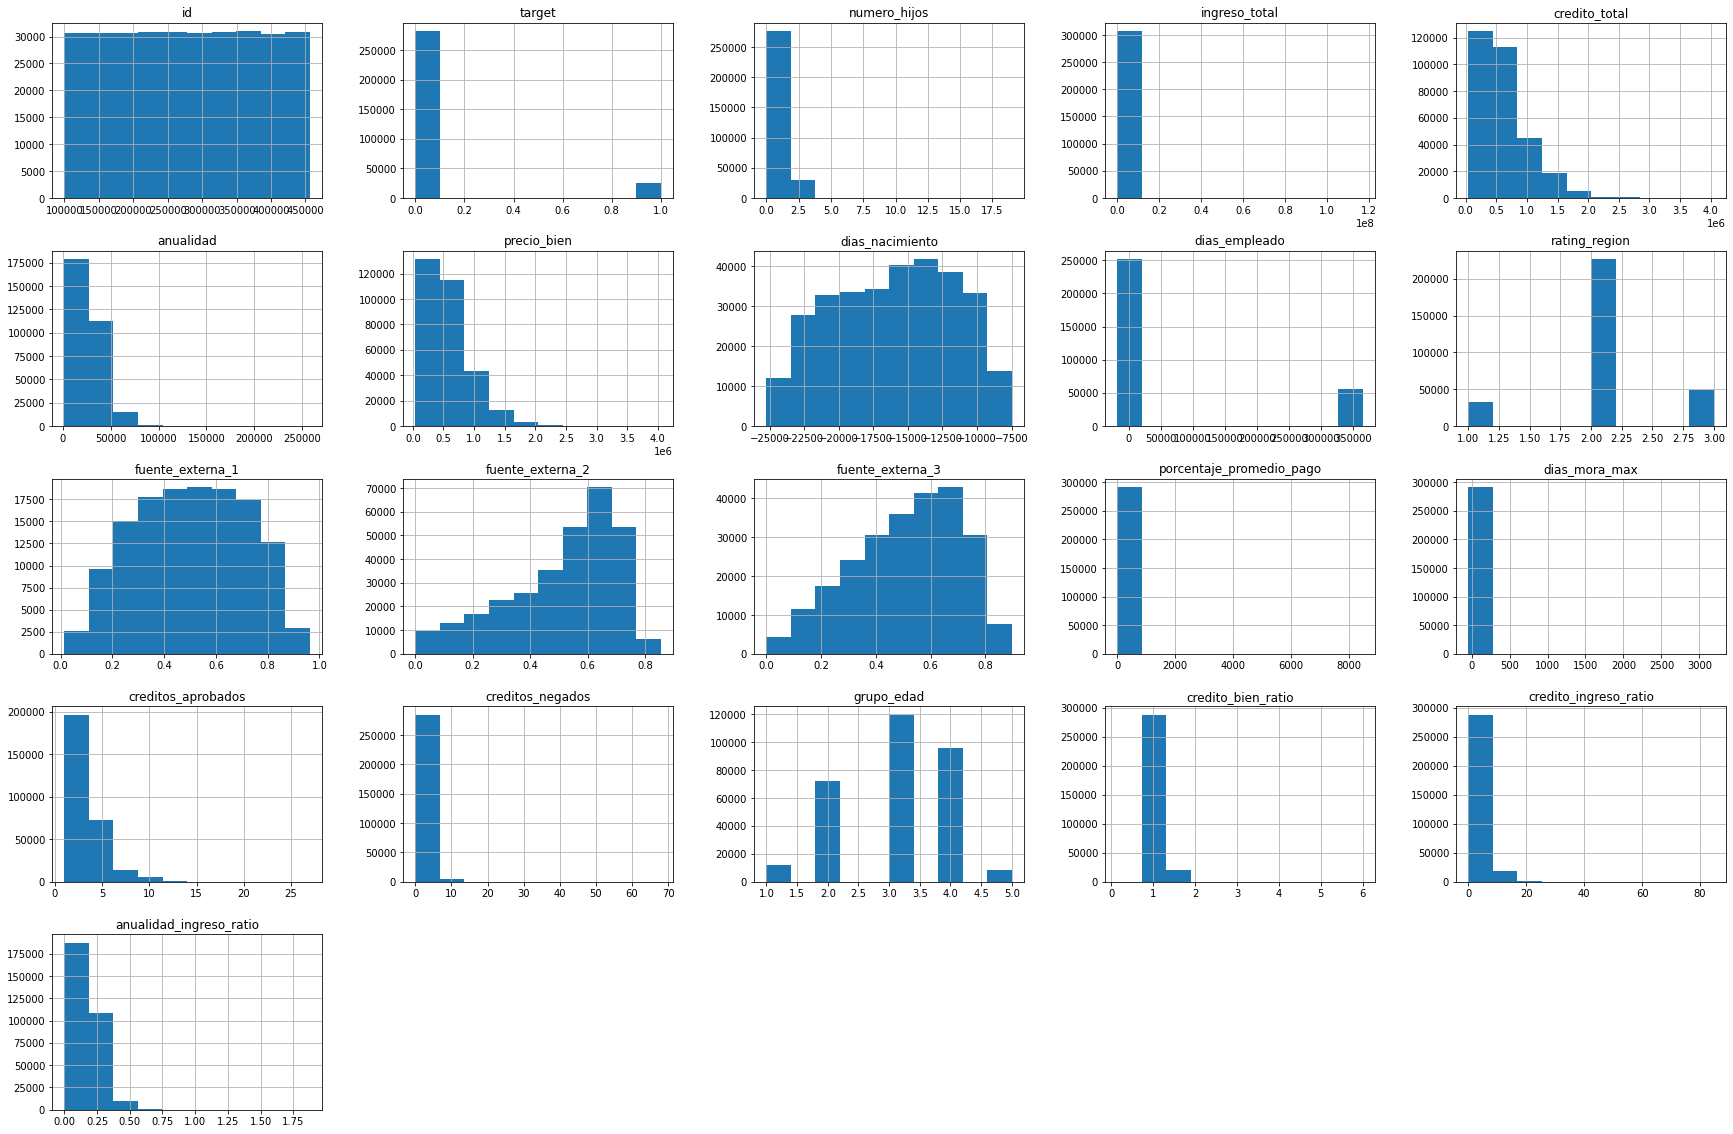

In [182]:
data.hist(figsize=(30,20));

#### 2.5 Visualización de variables categóricas

De esta manera se puede identificar el tipo de variable categórica, para así saber cómo tratarla.

In [183]:
# Ver valores únicos de cada variable categórica
for columna in data.columns:
    if data[columna].dtypes=='O':
        print(columna+': '+format(len(data[columna].unique())))

tipo_contrato: 2
sexo: 3
tiene_carro: 2
tiene_vivienda: 2
tipo_ingreso: 8
nivel_educacion: 5
tipo_vivienda: 6


# 3. Limpieza y transformación de datos

#### 3.1 asignación de índice

El indice a utilizar será el de SK_ID_CURR, cuyo nombre cambió a ID

In [184]:
data.set_index('id',inplace=True)
data.head(1)

,target,tipo_contrato,sexo,tiene_carro,tiene_vivienda,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,tipo_ingreso,nivel_educacion,tipo_vivienda,dias_nacimiento,dias_empleado,rating_region,fuente_externa_1,fuente_externa_2,fuente_externa_3,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-9461,-637,2,0.083037,0.262949,0.139376,1.0,31.0,1.0,0.0,2,1.158397,2.007889,0.121978


#### 3.2 cambio de variables a tipo adecuado

En este caso, se cambian las variables relacionadas a días, para que den números enteros. Además, se transforma la variable del rating de la región debido a que no se sabe qué parámetros representa cáda número, por lo que es más facil tratarla como una variable categórica.

In [185]:
#Para poder cambiar los tipos de las variables, se deben quitar primero los NAN
data.fillna(0, inplace=True)

In [186]:
data.dias_mora_max = data.dias_mora_max.astype(int)
data.creditos_aprobados = data.creditos_aprobados.astype(int)
data.creditos_negados = data.creditos_negados.astype(int)
data.rating_region = data.rating_region.astype(str)
data.target = data.target.astype(str)

#### 3.3 tratamiento de outliers

En la anterior parte se identificaron los outliers de las variables. En este caso, lo que se hace es transformar los datos que se encuentran por encima del limite superior y por debajo del límite inferior en valores nulos, y luego llenar esos datos de acuerdo a los cuartiles 1 y 3, y el rango intercuartil.  

Para este caso, no se modifica la variable de número de hijos, ya que es importante mantener los números enteros, pues modificar esta variable puede crear un sesgo a la hora de observar los insights.

In [187]:
lista_col_outliers = ['ingreso_total', 'credito_total', 'anualidad', 'precio_bien', 'creditos_aprobados', 'creditos_negados', 'porcentaje_promedio_pago',
                      'dias_mora_max', 'credito_bien_ratio', 'credito_ingreso_ratio', 'anualidad_ingreso_ratio']

for columna in lista_col_outliers:
    q1 = data[columna].quantile(0.25)
    q3 = data[columna].quantile(0.75)
    iqr = q3-q1 
    limite_arriba = q3 + 1.5*iqr
    limite_abajo = q1 - 1.5*iqr
    mediana = data.loc[data[columna]<q3 + 1.5*iqr, columna].median()
    media = data[columna].mean()
    data.loc[data[columna].abs() > limite_arriba,columna] = np.nan
    data[columna].fillna(limite_arriba, inplace=True)
    data.loc[data[columna].abs() < limite_abajo,columna] = np.nan
    data[columna].fillna(limite_abajo, inplace=True) 

<AxesSubplot:ylabel='anualidad_ingreso_ratio'>

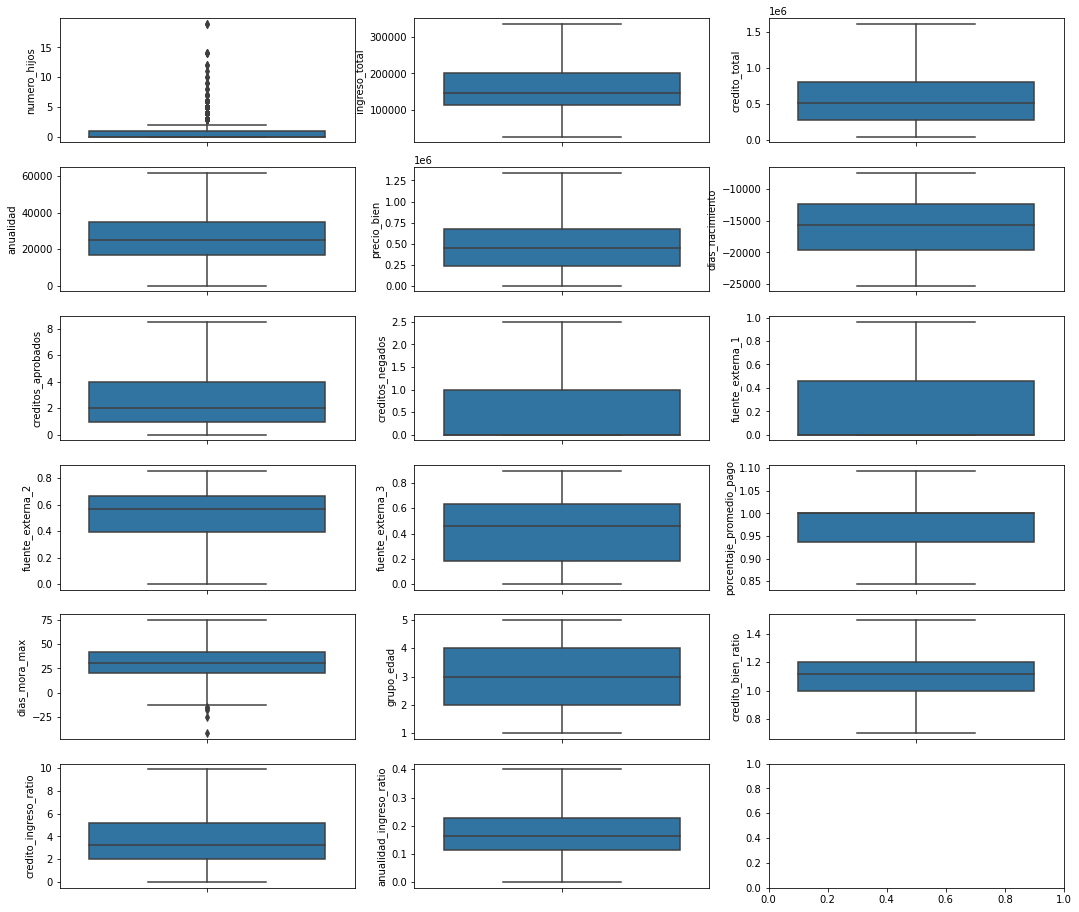

In [188]:
fig,ax = plt.subplots(6,3,figsize=(18,16))
sns.boxplot(data=data,y='numero_hijos',ax=ax[0,0])
sns.boxplot(data=data,y='ingreso_total',ax=ax[0,1])
sns.boxplot(data=data,y='credito_total',ax=ax[0,2])
sns.boxplot(data=data,y='anualidad',ax=ax[1,0])
sns.boxplot(data=data,y='precio_bien',ax=ax[1,1])
sns.boxplot(data=data,y='dias_nacimiento',ax=ax[1,2])
sns.boxplot(data=data,y='creditos_aprobados',ax=ax[2,0])
sns.boxplot(data=data,y='creditos_negados',ax=ax[2,1])
sns.boxplot(data=data,y='fuente_externa_1',ax=ax[2,2])
sns.boxplot(data=data,y='fuente_externa_2',ax=ax[3,0])
sns.boxplot(data=data,y='fuente_externa_3',ax=ax[3,1])
sns.boxplot(data=data,y='porcentaje_promedio_pago',ax=ax[3,2])
sns.boxplot(data=data,y='dias_mora_max',ax=ax[4,0])
sns.boxplot(data=data,y='grupo_edad',ax=ax[4,1])
sns.boxplot(data=data,y='credito_bien_ratio',ax=ax[4,2])
sns.boxplot(data=data,y='credito_ingreso_ratio',ax=ax[5,0])
sns.boxplot(data=data,y='anualidad_ingreso_ratio',ax=ax[5,1])

#### 3.4 tratamiento de variables con valores nulos

Los valores nulos ya han sido convertidos a 0, sin embargo, previamente se identificaron unas variables que tenían demasiados valores nulos, por lo que se decidió sacarlas

In [189]:
data.drop(columns=['fuente_externa_1'], inplace=True)
data.drop(columns=['fuente_externa_3'], inplace=True)
data.head(1)

,target,tipo_contrato,sexo,tiene_carro,tiene_vivienda,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,tipo_ingreso,nivel_educacion,tipo_vivienda,dias_nacimiento,dias_empleado,rating_region,fuente_externa_2,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-9461,-637,2,0.262949,1.0,31.0,1.0,0.0,2,1.158397,2.007889,0.121978


In [190]:
data.describe()

,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,dias_nacimiento,dias_empleado,fuente_externa_2,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
count,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.417052,162626.947877,5.923130e+05,26796.685361,5.274485e+05,-16036.995067,63815.045904,0.513289,0.970795,33.395274,2.837778,0.548397,3.049436,1.122258,3.866287,0.178524
std,0.722121,73303.150927,3.803162e+05,13282.335293,3.373755e+05,4363.988632,141275.766519,0.192334,0.068314,19.095032,2.020863,0.878292,0.898353,0.121425,2.371380,0.085884
min,0.000000,25650.000000,4.500000e+04,0.000000,0.000000e+00,-25229.000000,-17912.000000,0.000000,0.843750,-42.000000,0.000000,0.000000,1.000000,0.703000,0.004808,0.000000
25%,0.000000,112500.000000,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,0.390782,0.937500,20.000000,1.000000,0.000000,2.000000,1.000000,2.018667,0.114776
50%,0.000000,147150.000000,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,0.565467,1.000000,31.000000,2.000000,0.000000,3.000000,1.118800,3.265067,0.162833
75%,1.000000,202500.000000,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,0.663422,1.000000,42.000000,4.000000,1.000000,4.000000,1.198000,5.159880,0.229064
max,19.000000,337500.000000,1.616625e+06,61704.000000,1.341000e+06,-7489.000000,365243.000000,0.855000,1.093750,75.000000,8.500000,2.500000,5.000000,1.495000,9.871700,0.400495


In [191]:
#Ver cuantos 0 por variable hay
for columna in data.describe().columns:
    print(columna+': '+format(data.loc[data[columna] ==0].shape))

numero_hijos: (215371, 25)
ingreso_total: (0, 25)
credito_total: (0, 25)
anualidad: (12, 25)
precio_bien: (278, 25)
dias_nacimiento: (0, 25)
dias_empleado: (2, 25)
fuente_externa_2: (660, 25)
porcentaje_promedio_pago: (0, 25)
dias_mora_max: (16592, 25)
creditos_aprobados: (17446, 25)
creditos_negados: (207816, 25)
grupo_edad: (0, 25)
credito_bien_ratio: (0, 25)
credito_ingreso_ratio: (0, 25)
anualidad_ingreso_ratio: (12, 25)


#### 3.5 eliminación de variables similares o poco aportantes

Para que el dataset quede con información relevante, hay que eliminar aquellas variables que aportan la misma información que otras, o aquellas que no están aportando información relevante

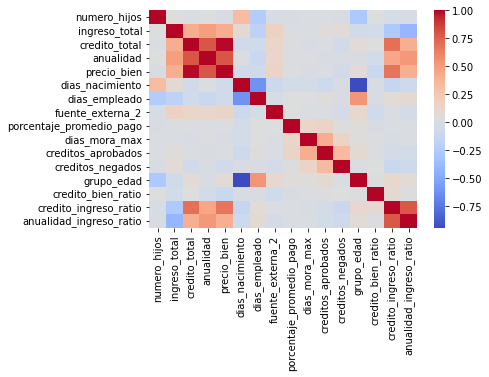

In [192]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm');

De acuerdo al anterior mapa de calor, que muestra las correlaciones entre las variables, podemos concluir que una variable que puede salir es la de dias de nacido. Esto porque aporta la misma información que grupo edad.  

Además, variables que presentan una correlación alta son los montos de crédito, ingreso y anualidad, y sus respectivos ratios, que fueron creados en la primera parte de este ejercicio. Sin embargo, no considero conveniente eliminar estas variables, ya que la información que aportan, aunque similar, llega a estar diferenciada debido a la intención y capacidades con las que se buscan los prestamos.

In [193]:
# Se elimina dias_nacimiento
data.drop(columns=['dias_nacimiento'], inplace=True)
data.head(1)

,target,tipo_contrato,sexo,tiene_carro,tiene_vivienda,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,tipo_ingreso,nivel_educacion,tipo_vivienda,dias_empleado,rating_region,fuente_externa_2,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-637,2,0.262949,1.0,31.0,1.0,0.0,2,1.158397,2.007889,0.121978


#### 3.6 análisis de variables categóricas

In [194]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def cramersv_dataframe_target(dataframe,nameTarget):
    df = pd.DataFrame(columns=['v_cramer'],index=dataframe.columns.tolist())
    for col in dataframe.columns.tolist():
        print('V de Cramer para {}: '.format(col) + format(round(cramers_v(dataframe[col],dataframe[nameTarget]),3)))
        df.loc[col,'v_cramer'] = round(cramers_v(dataframe[col],dataframe[nameTarget]),3)
    return df

In [195]:
lista_cat_var = []
for columna in data.columns:
  if data[columna].dtypes=='O':
    lista_cat_var.append(columna)

cramersv_dataframe_target(data.loc[:,data.columns.isin(lista_cat_var)],'target')

V de Cramer para target: 1.0
V de Cramer para tipo_contrato: 0.031
V de Cramer para sexo: 0.055
V de Cramer para tiene_carro: 0.022
V de Cramer para tiene_vivienda: 0.006
V de Cramer para tipo_ingreso: 0.064
V de Cramer para nivel_educacion: 0.057
V de Cramer para tipo_vivienda: 0.037
V de Cramer para rating_region: 0.059


,v_cramer
target,1.0
tipo_contrato,0.031
sexo,0.055
tiene_carro,0.022
tiene_vivienda,0.006
tipo_ingreso,0.064
nivel_educacion,0.057
tipo_vivienda,0.037
rating_region,0.059


In [196]:
def cramersv_dataframe(dataframe):
    df = pd.DataFrame(columns=dataframe.columns.tolist(),index=dataframe.columns.tolist())
    for index in dataframe.columns.tolist():
        for columna in dataframe.columns.tolist():
            df.loc[index,columna] = round(cramers_v(dataframe[index],dataframe[columna]),3)
    return df

cramers_df = cramersv_dataframe(data.loc[:,data.columns.isin(lista_cat_var)])
cramers_df

,target,tipo_contrato,sexo,tiene_carro,tiene_vivienda,tipo_ingreso,nivel_educacion,tipo_vivienda,rating_region
target,1.0,0.031,0.055,0.022,0.006,0.064,0.057,0.037,0.059
tipo_contrato,0.031,1.0,0.014,0.004,0.067,0.062,0.067,0.027,0.026
sexo,0.055,0.014,1.0,0.346,0.044,0.12,0.018,0.047,0.013
tiene_carro,0.022,0.004,0.346,1.0,0.002,0.157,0.097,0.04,0.023
tiene_vivienda,0.006,0.067,0.044,0.002,1.0,0.071,0.03,0.225,0.009
tipo_ingreso,0.064,0.062,0.12,0.157,0.071,1.0,0.104,0.055,0.135
nivel_educacion,0.057,0.067,0.018,0.097,0.03,0.104,1.0,0.042,0.071
tipo_vivienda,0.037,0.027,0.047,0.04,0.225,0.055,0.042,1.0,0.087
rating_region,0.059,0.026,0.013,0.023,0.009,0.135,0.071,0.087,1.0


Ninguna variable categórica contiene la misma información que otra, por lo que no es necesario remover. La variable que más relación tiene con otra es el sexo y el tener carro, pero esta sigue siendo baja (0.346)

# 4) Búsqueda de insights

Se hace este paso antes de encodear las variables categóricas debido a que estas se usarán como insumo para las diferentes gráficas que puden llegar a presentar insights

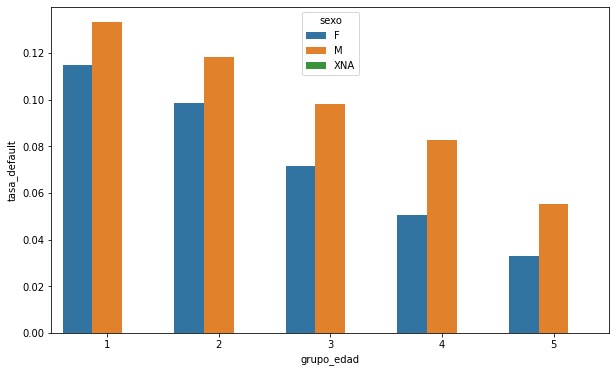

In [197]:
data.target = data.target.astype(float) #Por el momento se devuelve target a variable numérica para poder hacer operaciones con esta
x = data.groupby(['grupo_edad', 'sexo']).agg(tasa_default=('target','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='grupo_edad',y='tasa_default', hue='sexo');

Se observa que las personas más jovenes tienen un promedio de tasa de default más alta, y esta va disminuyendo a medida que avanza la edad. Además de esto, se hace evidente también que los hombres tienden a tener una tasa de default más alta que las mujeres.

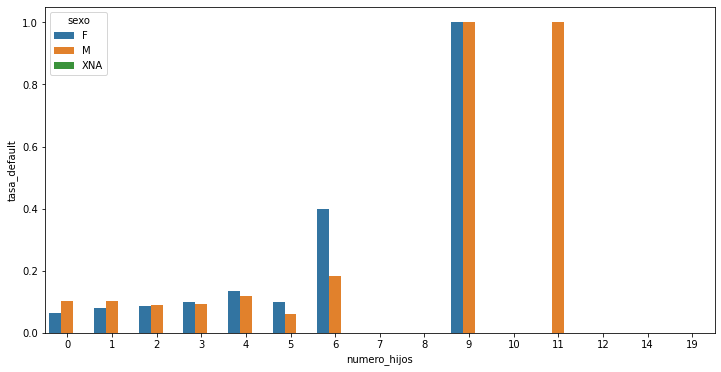

In [200]:
y = data.groupby(['numero_hijos', 'sexo']).agg(tasa_default=('target','mean')).reset_index()

fig,ax = plt.subplots(1,1,figsize=(12,6))
sns.barplot(data=y,x='numero_hijos',y='tasa_default', hue='sexo');

La tasa de default para personas con hijos no varía en mayor medida. Esto es, hasta los 5 hijos, ya que se observa que aquellos con 6 o más hijos (6, 9 & 10), tienen una tasa de default más alta.  
Estos datos, sin embargo, pueden tener un sesgo por la cantidad de personas que llegan a tener esta cantidad de hijos, ya que no son muchas. De hecho, solo una persona tiene 11 hijos dentro de la base de datos, así que cualuquier resultado arrastra en grán medida el promedio.

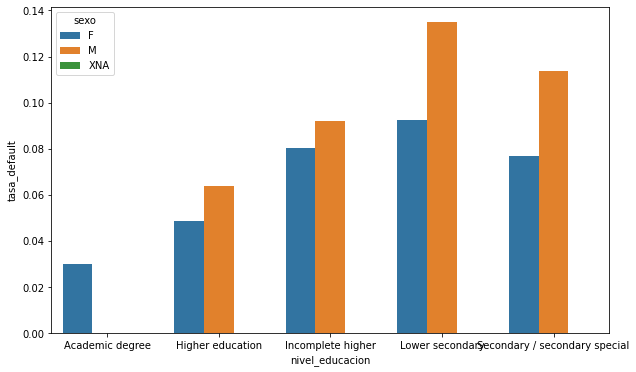

In [163]:
x = data.groupby(['nivel_educacion', 'sexo']).agg(tasa_default=('target','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='nivel_educacion',y='tasa_default', hue='sexo');

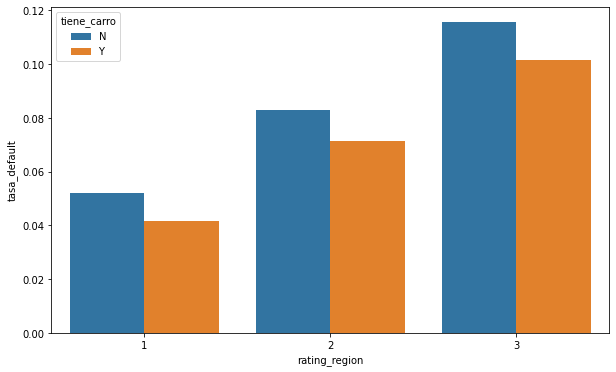

In [214]:
x = data.groupby(['rating_region', 'tiene_carro']).agg(tasa_default=('target','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='rating_region',y='tasa_default', hue='tiene_carro');

Se observa una clara relación entre el rating dado a la región donde viven los clientes, y la tasa de default.

Además, se evidencia una tasa de default más alta en personas que no tienen un carro propio. A pesar de esto, las tasas de default son bastante bajas para todos los casos.

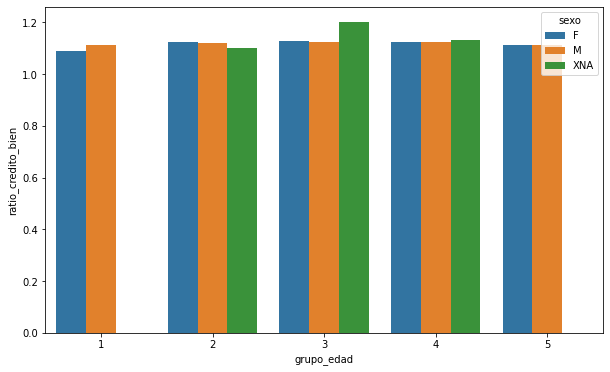

In [202]:
data.target = data.target.astype(float) #Por el momento se devuelve target a variable numérica para poder hacer operaciones con esta
x = data.groupby(['grupo_edad', 'sexo']).agg(ratio_credito_bien=('credito_bien_ratio','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='grupo_edad',y='ratio_credito_bien', hue='sexo');

El gráfico nos indica que todos los grupos tienen por lo general un ratio de credito/bien mayor a 1. esto significa que, en promedio, las personas piden un credito de un valor mayor al valor del bien para el que solicitan el crédito. Esto puede indicar que existe diversidad en las intenciones de los clientes, pues no destinarán todo lo solicitado en el bien que especifican.

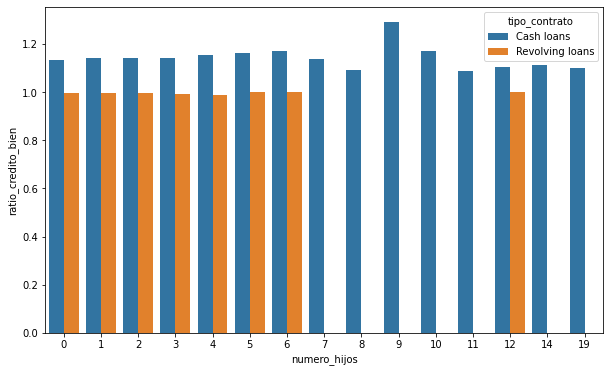

In [212]:
x = data.groupby(['numero_hijos', 'tipo_contrato']).agg(ratio_credito_bien=('credito_bien_ratio','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='numero_hijos',y='ratio_credito_bien', hue='tipo_contrato');

Dividiendo ahora las variables en tipo de contrato, se puede apreciar que por lo general, los préstamos revolventes no exceden el valor del bien para el que se solicitan, a diferencia del prestamo en efectivo, que si lo excede.

Esto puede indicar una mayor especificidad por parte de los clientes que solicitan prestamos revolventes, pues se usan con una única intención.

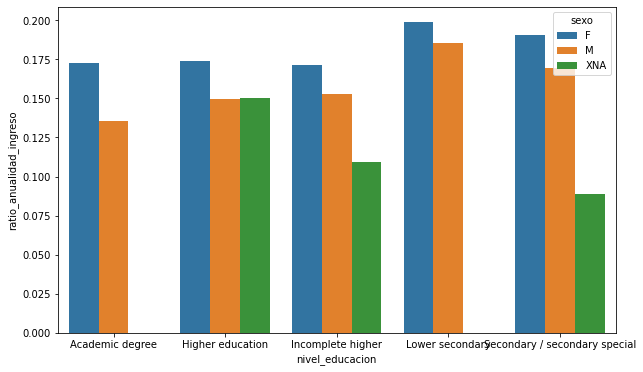

In [204]:
x = data.groupby(['nivel_educacion', 'sexo']).agg(ratio_anualidad_ingreso=('anualidad_ingreso_ratio','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='nivel_educacion',y='ratio_anualidad_ingreso', hue='sexo');

Se puede observar como, a pesar de tener las tasas de default más bajas, las mujeres son las que tienen un ratio de anualidad/ingreso mayor. Esto da a entender que estas tienen ya sea anualidades más altas, o ingresos totales más bajos.

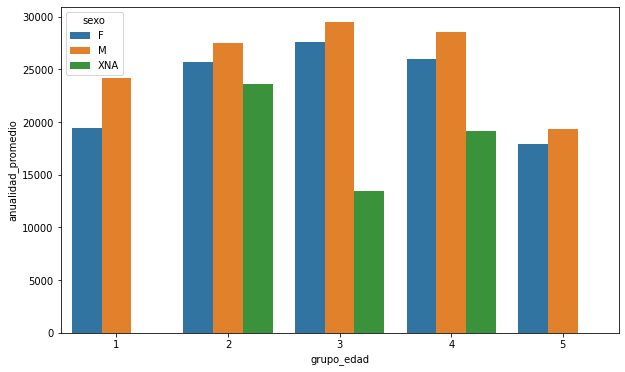

In [215]:
x = data.groupby(['grupo_edad', 'sexo']).agg(anualidad_promedio=('anualidad','mean')).reset_index()


fig,ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=x,x='grupo_edad',y='anualidad_promedio', hue='sexo');

Expandiendo la idea anterior, se observa cómo la anualidad promedio de los hombres es en promedio mayor al de las mujeres.

# 5) Encodear

In [205]:
data.target = data.target.astype(str) #Se devuelve la variable a categórica

#### 5.1 Variables categóricas

In [206]:
# One hot encoding
df_ohe = pd.get_dummies(data.loc[:,data.columns!='target'])
df_ohe = pd.merge(df_ohe, data.loc[:,'target'], left_index=True, right_index=True)
df_ohe.shape

(307511, 47)

In [207]:
df_ohe.head(1)

,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,dias_empleado,fuente_externa_2,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio,tipo_contrato_Cash loans,tipo_contrato_Revolving loans,sexo_F,sexo_M,sexo_XNA,tiene_carro_N,tiene_carro_Y,tiene_vivienda_N,tiene_vivienda_Y,tipo_ingreso_Businessman,tipo_ingreso_Commercial associate,tipo_ingreso_Maternity leave,tipo_ingreso_Pensioner,tipo_ingreso_State servant,tipo_ingreso_Student,tipo_ingreso_Unemployed,tipo_ingreso_Working,nivel_educacion_Academic degree,nivel_educacion_Higher education,nivel_educacion_Incomplete higher,nivel_educacion_Lower secondary,nivel_educacion_Secondary / secondary special,tipo_vivienda_Co-op apartment,tipo_vivienda_House / apartment,tipo_vivienda_Municipal apartment,tipo_vivienda_Office apartment,tipo_vivienda_Rented apartment,tipo_vivienda_With parents,rating_region_1,rating_region_2,rating_region_3,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,202500.0,406597.5,24700.5,351000.0,-637,0.262949,1.0,31.0,1.0,0.0,2,1.158397,2.007889,0.121978,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1.0


#### 5.2 Variable objetivo

Se tendría que encodear la variable objetivo. Sin embargo, como target ya es binomial y equivale a 0 y 1 respectivamente, solo hace falta cambiarle el tipo de dato

In [209]:
data.target = data.target.astype(float)
# Dataset final
data.head()

,target,tipo_contrato,sexo,tiene_carro,tiene_vivienda,numero_hijos,ingreso_total,credito_total,anualidad,precio_bien,tipo_ingreso,nivel_educacion,tipo_vivienda,dias_empleado,rating_region,fuente_externa_2,porcentaje_promedio_pago,dias_mora_max,creditos_aprobados,creditos_negados,grupo_edad,credito_bien_ratio,credito_ingreso_ratio,anualidad_ingreso_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,House / apartment,-637,2,0.262949,1.000000,31.0,1.0,0.0,2,1.158397,2.007889,0.121978
100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,House / apartment,-1188,1,0.622246,1.000000,14.0,3.0,0.0,3,1.145199,4.790750,0.132217
100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,House / apartment,-225,2,0.555912,1.000000,11.0,1.0,0.0,4,1.000000,2.000000,0.100000
100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,House / apartment,-3039,2,0.650442,1.000000,75.0,5.0,1.0,4,1.052803,2.316167,0.219900
100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,House / apartment,-3038,2,0.322738,0.954545,31.0,6.0,0.0,4,1.000000,4.222222,0.179963
